# Imports

In [87]:
import numpy as np
from pandas import read_csv, to_datetime

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.metrics import silhouette_score, silhouette_samples

In [90]:
import warnings
warnings.simplefilter("ignore")

# Data preparation

## Loading

In [91]:
df_orig = read_csv("data/spotifydataset.csv")
df_orig.drop(df_orig.columns[[0]], axis=1, inplace=True)

df = df_orig.copy()

df.head()

,artist_name,genres,followers,artist_popularity,artist_url,track_name,album_name,release_date,duration_ms,explicit,...,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Ariana Grande,pop,98934105,89,https://open.spotify.com/artist/66CXWjxzNUsdJx...,we can't be friends (wait for your love),eternal sunshine,2024-03-08,228639,False,...,0.646,5,-8.334,1,0.0427,0.0615,0.000030,0.0740,0.295,115.842
1,Ariana Grande,pop,98934105,85,https://open.spotify.com/artist/66CXWjxzNUsdJx...,the boy is mine,eternal sunshine,2024-03-08,173639,True,...,0.630,7,-5.854,0,0.0434,0.1570,0.000000,0.0732,0.447,97.998
2,Ariana Grande,pop,98934105,83,https://open.spotify.com/artist/66CXWjxzNUsdJx...,intro (end of the world),eternal sunshine,2024-03-08,92400,True,...,0.362,10,-9.480,1,0.0416,0.6700,0.000000,0.1760,0.385,84.726
3,Ariana Grande,pop,98934105,80,https://open.spotify.com/artist/66CXWjxzNUsdJx...,Save Your Tears (Remix) (with Ariana Grande) -...,After Hours (Deluxe),2020-03-20,191013,False,...,0.825,0,-4.645,1,0.0325,0.0215,0.000024,0.0936,0.593,118.091
4,Ariana Grande,pop,98934105,79,https://open.spotify.com/artist/66CXWjxzNUsdJx...,"yes, and?",eternal sunshine,2024-03-08,214994,True,...,0.775,1,-6.614,1,0.0548,0.1900,0.000065,0.1130,0.787,118.998


## Preparation

### NA

In [92]:
df.isna().sum()

artist_name            0
genres               163
followers              0
artist_popularity      0
artist_url             0
track_name             0
album_name             0
release_date           0
duration_ms            0
explicit               0
track_popularity       0
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
dtype: int64

In [93]:
df["genres"]

0                                                    pop
1                                                    pop
2                                                    pop
3                                                    pop
4                                                    pop
                             ...                        
995    atl hip hop, dirty south rap, hip hop, old sch...
996    atl hip hop, dirty south rap, hip hop, old sch...
997    atl hip hop, dirty south rap, hip hop, old sch...
998    atl hip hop, dirty south rap, hip hop, old sch...
999    atl hip hop, dirty south rap, hip hop, old sch...
Name: genres, Length: 1000, dtype: object

In [94]:
df["genres"].fillna("UNKNOWN", inplace=True)

In [95]:
df.isna().sum()

artist_name          0
genres               0
followers            0
artist_popularity    0
artist_url           0
track_name           0
album_name           0
release_date         0
duration_ms          0
explicit             0
track_popularity     0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
dtype: int64

In [96]:
df["genres"].value_counts()

genres
UNKNOWN                                                                                     163
pop                                                                                          40
dance pop, pop                                                                               20
british soul, pop, pop soul, uk pop                                                          10
east coast hip hop, hip hop, rap                                                             10
                                                                                           ... 
japanese teen pop                                                                            10
alt z                                                                                        10
ambient folk, indie folk                                                                     10
atl hip hop, dirty south rap, hip hop, old school atlanta hip hop, rap, southern hip hop     10
social media pop                 

### Categorial

#### `artist_*`

In [97]:
df.artist_name.value_counts()

artist_name
A                 106
a                  12
Ariana Grande      10
Adele              10
Arctic Monkeys     10
                 ... 
Aaliyah            10
Gracie Abrams      10
Addison Rae         7
alex_g_offline      4
Ã                   1
Name: count, Length: 92, dtype: int64

In [98]:
df.artist_url.value_counts()

artist_url
https://open.spotify.com/artist/66CXWjxzNUsdJxJ2JdwvnR    10
https://open.spotify.com/artist/4dpARuHxo51G3z768sgnrY    10
https://open.spotify.com/artist/13ubrt8QOOCPljQ2FL1Kca    10
https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02    10
https://open.spotify.com/artist/7Ln80lUS6He07XvHI8qqHH    10
                                                          ..
https://open.spotify.com/artist/0VeuhtyLJhzeGV4ht7EstC     1
https://open.spotify.com/artist/1t0QSnG1mYs88ahQmAgeuK     1
https://open.spotify.com/artist/3dkzFPQ0RzpI6jFjPXaqki     1
https://open.spotify.com/artist/1dIc8SElekAIf7zZUc3e1y     1
https://open.spotify.com/artist/5FnG9lLegyiFtLtZG2XLQ4     1
Name: count, Length: 118, dtype: int64

In [99]:
df["artist_id"] = df.groupby(["artist_name", "artist_url"]).ngroup() + 1
df[["artist_id", "artist_name", "artist_url"]]

,artist_id,artist_name,artist_url
0,76,Ariana Grande,https://open.spotify.com/artist/66CXWjxzNUsdJx...
1,76,Ariana Grande,https://open.spotify.com/artist/66CXWjxzNUsdJx...
2,76,Ariana Grande,https://open.spotify.com/artist/66CXWjxzNUsdJx...
3,76,Ariana Grande,https://open.spotify.com/artist/66CXWjxzNUsdJx...
4,76,Ariana Grande,https://open.spotify.com/artist/66CXWjxzNUsdJx...
...,...,...,...
995,102,Outkast,https://open.spotify.com/artist/1G9G7WwrXka3Z1...
996,102,Outkast,https://open.spotify.com/artist/1G9G7WwrXka3Z1...
997,102,Outkast,https://open.spotify.com/artist/1G9G7WwrXka3Z1...
998,102,Outkast,https://open.spotify.com/artist/1G9G7WwrXka3Z1...


In [100]:
df.drop(['artist_name', 'artist_url'], axis=1, inplace=True)  # Так как мы уже их сгруппировали
df

,genres,followers,artist_popularity,track_name,album_name,release_date,duration_ms,explicit,track_popularity,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_id
0,pop,98934105,89,we can't be friends (wait for your love),eternal sunshine,2024-03-08,228639,False,89,0.645,...,5,-8.334,1,0.0427,0.0615,0.000030,0.0740,0.295,115.842,76
1,pop,98934105,85,the boy is mine,eternal sunshine,2024-03-08,173639,True,85,0.795,...,7,-5.854,0,0.0434,0.1570,0.000000,0.0732,0.447,97.998,76
2,pop,98934105,83,intro (end of the world),eternal sunshine,2024-03-08,92400,True,83,0.506,...,10,-9.480,1,0.0416,0.6700,0.000000,0.1760,0.385,84.726,76
3,pop,98934105,80,Save Your Tears (Remix) (with Ariana Grande) -...,After Hours (Deluxe),2020-03-20,191013,False,80,0.650,...,0,-4.645,1,0.0325,0.0215,0.000024,0.0936,0.593,118.091,76
4,pop,98934105,79,"yes, and?",eternal sunshine,2024-03-08,214994,True,79,0.787,...,1,-6.614,1,0.0548,0.1900,0.000065,0.1130,0.787,118.998,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"atl hip hop, dirty south rap, hip hop, old sch...",2769972,69,Roses,Speakerboxxx/The Love Below,2003,369573,True,69,0.751,...,0,-5.653,1,0.0545,0.0482,0.000018,0.1070,0.509,108.970,102
996,"atl hip hop, dirty south rap, hip hop, old sch...",2769972,64,Rosa Parks,Aquemini,1998-09-29,324373,True,64,0.792,...,6,-7.198,0,0.2830,0.1050,0.000000,0.7610,0.251,103.890,102
997,"atl hip hop, dirty south rap, hip hop, old sch...",2769972,60,B.O.B. - Bombs Over Baghdad,Stankonia,2000-10-31,304226,True,60,0.746,...,9,-5.324,1,0.0978,0.0555,0.000041,0.0260,0.653,153.809,102
998,"atl hip hop, dirty south rap, hip hop, old sch...",2769972,59,Da Art of Storytellin' (Pt. 1),Aquemini,1998-09-29,222653,True,59,0.749,...,2,-5.833,1,0.2350,0.1070,0.000000,0.7450,0.402,103.773,102


#### `track_name`

In [101]:
col = "track_name"

In [102]:
count_tracks = df[col].value_counts()
idxs = count_tracks[count_tracks > 1].index
count_tracks

track_name
Closer                                                2
Chaleya                                               2
Jungle                                                2
Beautiful                                             2
My Boo                                                2
                                                     ..
Roses                                                 1
Rosa Parks                                            1
B.O.B. - Bombs Over Baghdad                           1
Da Art of Storytellin' (Pt. 1)                        1
Everyday (feat. Rod Stewart, Miguel & Mark Ronson)    1
Name: count, Length: 984, dtype: int64

In [103]:
df[df[col].isin(idxs)].sort_values(col)  # Дубликаты (из-за жанров)

,genres,followers,artist_popularity,track_name,album_name,release_date,duration_ms,explicit,track_popularity,danceability,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_id
419,electro house,39210855,73,"Alone, Pt. II",World Of Walker,2021-11-26,179052,False,73,0.673,...,3,-4.493,0,0.0439,0.539000,0.000000,0.1290,0.6280,88.011,48
441,pop,7041802,73,"Alone, Pt. II",World Of Walker,2021-11-26,179052,False,73,0.673,...,3,-4.493,0,0.0439,0.539000,0.000000,0.1290,0.6280,88.011,83
184,dance pop,4816768,70,Beautiful,Freedom,2008-01-01,312986,False,70,0.739,...,0,-4.443,0,0.0881,0.125000,0.000000,0.1120,0.6270,130.018,45
477,"dance pop, pop",8411343,67,Beautiful,Stripped,2002-07-19,238560,False,67,0.456,...,5,-3.866,0,0.0275,0.578000,0.000003,0.1140,0.0992,76.190,90
442,pop,7041802,74,Car Keys (Ayla),Car Keys (Ayla),2023-06-30,147211,False,74,0.719,...,9,-5.290,0,0.1250,0.341000,0.000000,0.2550,0.5220,126.031,83
661,"electro house, pop nacional, slap house",11291607,74,Car Keys (Ayla),Car Keys (Ayla),2023-06-30,147211,False,74,0.719,...,9,-5.290,0,0.1250,0.341000,0.000000,0.2550,0.5220,126.031,60
199,"filmi, modern bollywood",119428689,74,Chaleya,Jawan,2023-09-05,200373,False,74,0.575,...,0,-5.280,1,0.0852,0.393000,0.010700,0.1310,0.4390,95.047,77
734,"desi hip hop, filmi, tamil hip hop",31427977,74,Chaleya,Jawan,2023-09-05,200373,False,74,0.575,...,0,-5.280,1,0.0852,0.393000,0.010700,0.1310,0.4390,95.047,69
127,"electropop, etherpop, indie poptimism, pop",21674751,84,Closer,Closer,2016-07-29,244960,False,84,0.748,...,8,-5.599,1,0.0338,0.414000,0.000000,0.1110,0.6610,95.010,96
769,"dance pop, pop, r&b, urban contemporary",9033803,66,Closer,Year Of The Gentleman (Bonus Track Edition),2008-01-01,234360,False,66,0.711,...,4,-6.461,0,0.0763,0.028000,0.000030,0.1520,0.5900,126.050,100


In [104]:
df["track_id"] = (
    df.groupby(
        [
            "track_name",
            "album_name",
            "duration_ms",
            "release_date",
            "energy",
            "loudness",
            "mode",
            "danceability",
            "speechiness",
            "tempo",
        ]
    ).ngroup()
    + 1
)
df.track_id.value_counts()

track_id
145    2
138    2
554    2
53     2
262    2
      ..
693    1
692    1
74     1
184    1
911    1
Name: count, Length: 993, dtype: int64

In [105]:
df.drop(["track_name"], axis=1, inplace=True)
df

,genres,followers,artist_popularity,album_name,release_date,duration_ms,explicit,track_popularity,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_id,track_id
0,pop,98934105,89,eternal sunshine,2024-03-08,228639,False,89,0.645,0.646,...,-8.334,1,0.0427,0.0615,0.000030,0.0740,0.295,115.842,76,982
1,pop,98934105,85,eternal sunshine,2024-03-08,173639,True,85,0.795,0.630,...,-5.854,0,0.0434,0.1570,0.000000,0.0732,0.447,97.998,76,978
2,pop,98934105,83,eternal sunshine,2024-03-08,92400,True,83,0.506,0.362,...,-9.480,1,0.0416,0.6700,0.000000,0.1760,0.385,84.726,76,968
3,pop,98934105,80,After Hours (Deluxe),2020-03-20,191013,False,80,0.650,0.825,...,-4.645,1,0.0325,0.0215,0.000024,0.0936,0.593,118.091,76,720
4,pop,98934105,79,eternal sunshine,2024-03-08,214994,True,79,0.787,0.775,...,-6.614,1,0.0548,0.1900,0.000065,0.1130,0.787,118.998,76,984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"atl hip hop, dirty south rap, hip hop, old sch...",2769972,69,Speakerboxxx/The Love Below,2003,369573,True,69,0.751,0.708,...,-5.653,1,0.0545,0.0482,0.000018,0.1070,0.509,108.970,102,693
996,"atl hip hop, dirty south rap, hip hop, old sch...",2769972,64,Aquemini,1998-09-29,324373,True,64,0.792,0.701,...,-7.198,0,0.2830,0.1050,0.000000,0.7610,0.251,103.890,102,692
997,"atl hip hop, dirty south rap, hip hop, old sch...",2769972,60,Stankonia,2000-10-31,304226,True,60,0.746,0.978,...,-5.324,1,0.0978,0.0555,0.000041,0.0260,0.653,153.809,102,74
998,"atl hip hop, dirty south rap, hip hop, old sch...",2769972,59,Aquemini,1998-09-29,222653,True,59,0.749,0.856,...,-5.833,1,0.2350,0.1070,0.000000,0.7450,0.402,103.773,102,184


#### `album_name`

In [106]:
encoder = LabelEncoder()
df["album_name"] = encoder.fit_transform(df["album_name"])
df

,genres,followers,artist_popularity,album_name,release_date,duration_ms,explicit,track_popularity,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_id,track_id
0,pop,98934105,89,579,2024-03-08,228639,False,89,0.645,0.646,...,-8.334,1,0.0427,0.0615,0.000030,0.0740,0.295,115.842,76,982
1,pop,98934105,85,579,2024-03-08,173639,True,85,0.795,0.630,...,-5.854,0,0.0434,0.1570,0.000000,0.0732,0.447,97.998,76,978
2,pop,98934105,83,579,2024-03-08,92400,True,83,0.506,0.362,...,-9.480,1,0.0416,0.6700,0.000000,0.1760,0.385,84.726,76,968
3,pop,98934105,80,37,2020-03-20,191013,False,80,0.650,0.825,...,-4.645,1,0.0325,0.0215,0.000024,0.0936,0.593,118.091,76,720
4,pop,98934105,79,579,2024-03-08,214994,True,79,0.787,0.775,...,-6.614,1,0.0548,0.1900,0.000065,0.1130,0.787,118.998,76,984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"atl hip hop, dirty south rap, hip hop, old sch...",2769972,69,442,2003,369573,True,69,0.751,0.708,...,-5.653,1,0.0545,0.0482,0.000018,0.1070,0.509,108.970,102,693
996,"atl hip hop, dirty south rap, hip hop, old sch...",2769972,64,54,1998-09-29,324373,True,64,0.792,0.701,...,-7.198,0,0.2830,0.1050,0.000000,0.7610,0.251,103.890,102,692
997,"atl hip hop, dirty south rap, hip hop, old sch...",2769972,60,445,2000-10-31,304226,True,60,0.746,0.978,...,-5.324,1,0.0978,0.0555,0.000041,0.0260,0.653,153.809,102,74
998,"atl hip hop, dirty south rap, hip hop, old sch...",2769972,59,54,1998-09-29,222653,True,59,0.749,0.856,...,-5.833,1,0.2350,0.1070,0.000000,0.7450,0.402,103.773,102,184


#### date

In [107]:
df["valid_date"] = to_datetime(
    df["release_date"], format="%Y-%m-%d", errors="coerce"
)
df[df["valid_date"].isna()]

,genres,followers,artist_popularity,album_name,release_date,duration_ms,explicit,track_popularity,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_id,track_id,valid_date
25,"east coast hip hop, hip hop, rap",14740526,77,288,2013,236280,True,77,0.801,0.819,...,1,0.1580,0.2920,0.000000,0.5150,0.8110,139.969,29,284,NaT
27,"east coast hip hop, hip hop, rap",14740526,76,288,2013,233786,True,76,0.853,0.693,...,1,0.2750,0.0239,0.000000,0.1100,0.6620,95.967,29,277,NaT
28,"east coast hip hop, hip hop, rap",14740526,76,288,2013,220133,True,76,0.597,0.427,...,0,0.0536,0.1800,0.000013,0.1210,0.0997,120.085,29,465,NaT
52,"alternative metal, alternative rock, grunge, h...",5216015,72,270,1994,259200,False,72,0.384,0.561,...,0,0.0296,0.3730,0.253000,0.0775,0.1590,136.136,57,583,NaT
57,"alternative metal, alternative rock, grunge, h...",5216015,64,270,1994,255573,False,64,0.527,0.838,...,1,0.0323,0.0206,0.000620,0.0700,0.7210,117.454,57,572,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,"album rock, classic rock, folk rock, mellow go...",1779973,58,49,1972,181093,False,58,0.696,0.522,...,0,0.0394,0.6850,0.193000,0.1660,0.8810,156.488,64,684,NaT
893,"album rock, classic rock, folk rock, mellow go...",1779973,56,49,1972,183186,False,56,0.529,0.472,...,1,0.0267,0.5830,0.000000,0.1290,0.2500,134.100,64,394,NaT
990,"atl hip hop, dirty south rap, hip hop, old sch...",2769972,84,442,2003,235213,False,84,0.727,0.974,...,0,0.0664,0.1030,0.000532,0.1740,0.9650,79.526,102,368,NaT
993,"atl hip hop, dirty south rap, hip hop, old sch...",2769972,71,442,2003,234000,True,71,0.871,0.597,...,0,0.0464,0.1260,0.000113,0.0638,0.6350,125.999,102,832,NaT


In [108]:
df["valid_date"] = df["valid_date"].fillna(
    to_datetime(df["release_date"].astype(str) + "-01-01")
)

In [109]:
df["year"] = df["valid_date"].dt.year
df["month"] = df["valid_date"].dt.month
df["day"] = df["valid_date"].dt.day

In [110]:
df.drop(['valid_date', 'release_date'], axis=1, inplace=True)
df

,genres,followers,artist_popularity,album_name,duration_ms,explicit,track_popularity,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,artist_id,track_id,year,month,day
0,pop,98934105,89,579,228639,False,89,0.645,0.646,5,...,0.0615,0.000030,0.0740,0.295,115.842,76,982,2024,3,8
1,pop,98934105,85,579,173639,True,85,0.795,0.630,7,...,0.1570,0.000000,0.0732,0.447,97.998,76,978,2024,3,8
2,pop,98934105,83,579,92400,True,83,0.506,0.362,10,...,0.6700,0.000000,0.1760,0.385,84.726,76,968,2024,3,8
3,pop,98934105,80,37,191013,False,80,0.650,0.825,0,...,0.0215,0.000024,0.0936,0.593,118.091,76,720,2020,3,20
4,pop,98934105,79,579,214994,True,79,0.787,0.775,1,...,0.1900,0.000065,0.1130,0.787,118.998,76,984,2024,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"atl hip hop, dirty south rap, hip hop, old sch...",2769972,69,442,369573,True,69,0.751,0.708,0,...,0.0482,0.000018,0.1070,0.509,108.970,102,693,2003,1,1
996,"atl hip hop, dirty south rap, hip hop, old sch...",2769972,64,54,324373,True,64,0.792,0.701,6,...,0.1050,0.000000,0.7610,0.251,103.890,102,692,1998,9,29
997,"atl hip hop, dirty south rap, hip hop, old sch...",2769972,60,445,304226,True,60,0.746,0.978,9,...,0.0555,0.000041,0.0260,0.653,153.809,102,74,2000,10,31
998,"atl hip hop, dirty south rap, hip hop, old sch...",2769972,59,54,222653,True,59,0.749,0.856,2,...,0.1070,0.000000,0.7450,0.402,103.773,102,184,1998,9,29


#### `genres`

In [111]:
df.genres.value_counts()

genres
UNKNOWN                                                                                     163
pop                                                                                          40
dance pop, pop                                                                               20
british soul, pop, pop soul, uk pop                                                          10
east coast hip hop, hip hop, rap                                                             10
                                                                                           ... 
japanese teen pop                                                                            10
alt z                                                                                        10
ambient folk, indie folk                                                                     10
atl hip hop, dirty south rap, hip hop, old school atlanta hip hop, rap, southern hip hop     10
social media pop                 

In [112]:
all_genres = set()
df["genres"].str.split(", ").apply(
    lambda x: all_genres.update(x) if isinstance(x, list) else None
)
all_genres, len(all_genres)

({'UNKNOWN',
  'afrobeats',
  'album rock',
  'alt z',
  'alternative hip hop',
  'alternative metal',
  'alternative rock',
  'ambient',
  'ambient folk',
  'art pop',
  'atl hip hop',
  'atl trap',
  'australian rock',
  'bachata',
  'bachata dominicana',
  'banda',
  'baroque',
  'big room',
  'braindance',
  'british alternative rock',
  'british soul',
  'canadian contemporary r&b',
  'canadian pop',
  'canadian singer-songwriter',
  'candy pop',
  'chamber pop',
  'classic rock',
  'classical',
  'classical era',
  'conscious hip hop',
  'contemporary country',
  'contemporary r&b',
  'corrido',
  'country',
  'country road',
  'country rock',
  'countrygaze',
  'dance pop',
  'dembow',
  'desi hip hop',
  'detroit rock',
  'dirty south rap',
  'dream pop',
  'dreamo',
  'drumless hip hop',
  'dutch house',
  'dutch trance',
  'early music',
  'east coast hip hop',
  'edm',
  'electro house',
  'electronica',
  'electropop',
  'escape room',
  'etherpop',
  'europop',
  'filmi',


In [113]:
for genre in sorted(all_genres):
    df[f"genre_{genre}"] = df["genres"].str.contains(genre).astype(int)

df.drop("genres", axis=1, inplace=True)
df

,followers,artist_popularity,album_name,duration_ms,explicit,track_popularity,danceability,energy,key,loudness,...,genre_trap,genre_trap boricua,genre_trap latino,genre_tropical,genre_uk experimental electronic,genre_uk pop,genre_urban contemporary,genre_urbano latino,genre_viral pop,genre_west coast rap
0,98934105,89,579,228639,False,89,0.645,0.646,5,-8.334,...,0,0,0,0,0,0,0,0,0,0
1,98934105,85,579,173639,True,85,0.795,0.630,7,-5.854,...,0,0,0,0,0,0,0,0,0,0
2,98934105,83,579,92400,True,83,0.506,0.362,10,-9.480,...,0,0,0,0,0,0,0,0,0,0
3,98934105,80,37,191013,False,80,0.650,0.825,0,-4.645,...,0,0,0,0,0,0,0,0,0,0
4,98934105,79,579,214994,True,79,0.787,0.775,1,-6.614,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2769972,69,442,369573,True,69,0.751,0.708,0,-5.653,...,0,0,0,0,0,0,0,0,0,0
996,2769972,64,54,324373,True,64,0.792,0.701,6,-7.198,...,0,0,0,0,0,0,0,0,0,0
997,2769972,60,445,304226,True,60,0.746,0.978,9,-5.324,...,0,0,0,0,0,0,0,0,0,0
998,2769972,59,54,222653,True,59,0.749,0.856,2,-5.833,...,0,0,0,0,0,0,0,0,0,0


## Correlation

In [114]:
df.dtypes

followers                   int64
artist_popularity           int64
album_name                  int64
duration_ms                 int64
explicit                     bool
                            ...  
genre_uk pop                int64
genre_urban contemporary    int64
genre_urbano latino         int64
genre_viral pop             int64
genre_west coast rap        int64
Length: 178, dtype: object

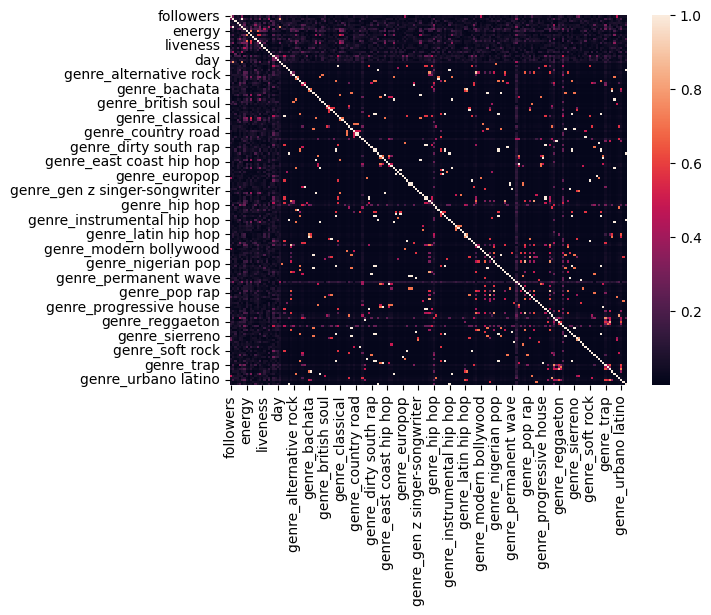

In [115]:
sns.heatmap(np.abs(df.corr()))
plt.show()

In [116]:
cols = df.columns
for i in range(len(cols)):
    for col in df.columns:
        if col != cols[i]:
            val = df[cols[i]].corr(df[col])
            if np.abs(val) > 0.95:
                print(f"{col} \t \t <--{val:.2f}--> \t \t {cols[i]}")
                df.drop(cols[i], axis=1, inplace=True)
                break

track_popularity 	 	 <--1.00--> 	 	 artist_popularity
genre_classic rock 	 	 <--1.00--> 	 	 genre_album rock
genre_drumless hip hop 	 	 <--1.00--> 	 	 genre_alternative hip hop
genre_indie folk 	 	 <--1.00--> 	 	 genre_ambient folk
genre_gangster rap 	 	 <--1.00--> 	 	 genre_atl trap
genre_latin pop 	 	 <--1.00--> 	 	 genre_bachata
genre_tropical 	 	 <--1.00--> 	 	 genre_bachata dominicana
genre_musica mexicana 	 	 <--1.00--> 	 	 genre_banda
genre_early music 	 	 <--1.00--> 	 	 genre_baroque
genre_electronica 	 	 <--1.00--> 	 	 genre_braindance
genre_lilith 	 	 <--1.00--> 	 	 genre_canadian singer-songwriter
genre_dream pop 	 	 <--1.00--> 	 	 genre_chamber pop
genre_sad sierreno 	 	 <--1.00--> 	 	 genre_corrido
genre_country rock 	 	 <--1.00--> 	 	 genre_country road
genre_small room 	 	 <--1.00--> 	 	 genre_countrygaze
genre_rap dominicano 	 	 <--1.00--> 	 	 genre_dembow
genre_tamil hip hop 	 	 <--1.00--> 	 	 genre_desi hip hop
genre_glam metal 	 	 <--1.00--> 	 	 genre_detroit rock
ge

## Scaling

In [117]:
scaler = StandardScaler()

df = scaler.fit_transform(df)

# Clusterisation

## Preparation

In [118]:
def draw_visual(x, clusters, idx_subplot, title):
    plt.subplot(*idx_subplot)
    scatter_pca = plt.scatter(
        x[:, 0], x[:, 1], c=clusters, cmap="viridis", alpha=0.6, s=20
    )
    plt.colorbar(scatter_pca, label="Cluster")
    plt.title(f"{title[0]} Visualization")
    plt.xlabel(f"{title[1]} 1")
    plt.ylabel(f"{title[1]} 2")

## K-means

### Elbow method

In [119]:
inertia = []
k_vals = np.arange(1, 200)
for k in k_vals:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

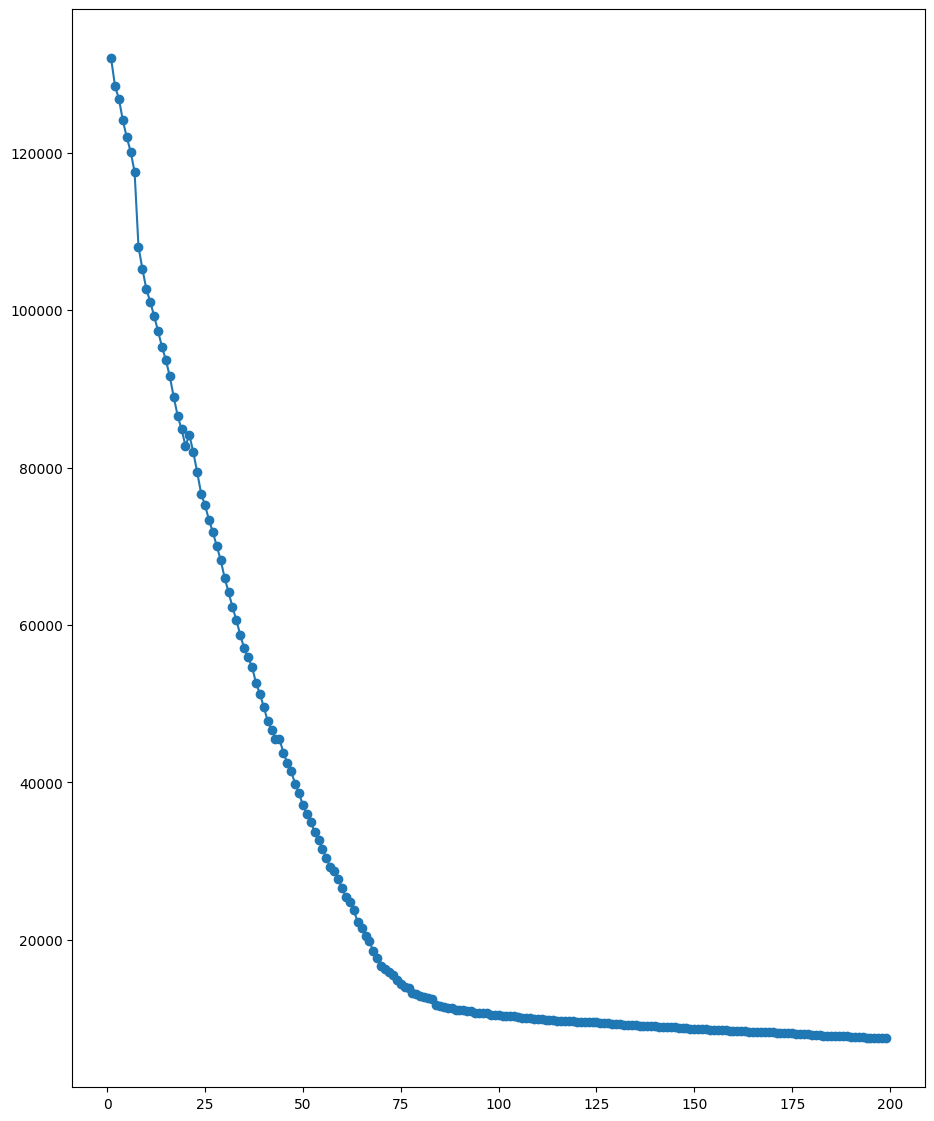

In [120]:
plt.figure(figsize=(11, 14))
plt.plot(k_vals, inertia, marker='o')

### Model

In [123]:
K = 80

In [132]:
random_state = 42

In [133]:
kmeans = KMeans(n_clusters=K, random_state=random_state)
clusters = kmeans.fit_predict(df)
df_orig["cluster"] = clusters

In [134]:
df_orig

,artist_name,genres,followers,artist_popularity,artist_url,track_name,album_name,release_date,duration_ms,explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,Ariana Grande,pop,98934105,89,https://open.spotify.com/artist/66CXWjxzNUsdJx...,we can't be friends (wait for your love),eternal sunshine,2024-03-08,228639,False,...,5,-8.334,1,0.0427,0.0615,0.000030,0.0740,0.295,115.842,7
1,Ariana Grande,pop,98934105,85,https://open.spotify.com/artist/66CXWjxzNUsdJx...,the boy is mine,eternal sunshine,2024-03-08,173639,True,...,7,-5.854,0,0.0434,0.1570,0.000000,0.0732,0.447,97.998,7
2,Ariana Grande,pop,98934105,83,https://open.spotify.com/artist/66CXWjxzNUsdJx...,intro (end of the world),eternal sunshine,2024-03-08,92400,True,...,10,-9.480,1,0.0416,0.6700,0.000000,0.1760,0.385,84.726,7
3,Ariana Grande,pop,98934105,80,https://open.spotify.com/artist/66CXWjxzNUsdJx...,Save Your Tears (Remix) (with Ariana Grande) -...,After Hours (Deluxe),2020-03-20,191013,False,...,0,-4.645,1,0.0325,0.0215,0.000024,0.0936,0.593,118.091,7
4,Ariana Grande,pop,98934105,79,https://open.spotify.com/artist/66CXWjxzNUsdJx...,"yes, and?",eternal sunshine,2024-03-08,214994,True,...,1,-6.614,1,0.0548,0.1900,0.000065,0.1130,0.787,118.998,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Outkast,"atl hip hop, dirty south rap, hip hop, old sch...",2769972,69,https://open.spotify.com/artist/1G9G7WwrXka3Z1...,Roses,Speakerboxxx/The Love Below,2003,369573,True,...,0,-5.653,1,0.0545,0.0482,0.000018,0.1070,0.509,108.970,26
996,Outkast,"atl hip hop, dirty south rap, hip hop, old sch...",2769972,64,https://open.spotify.com/artist/1G9G7WwrXka3Z1...,Rosa Parks,Aquemini,1998-09-29,324373,True,...,6,-7.198,0,0.2830,0.1050,0.000000,0.7610,0.251,103.890,26
997,Outkast,"atl hip hop, dirty south rap, hip hop, old sch...",2769972,60,https://open.spotify.com/artist/1G9G7WwrXka3Z1...,B.O.B. - Bombs Over Baghdad,Stankonia,2000-10-31,304226,True,...,9,-5.324,1,0.0978,0.0555,0.000041,0.0260,0.653,153.809,26
998,Outkast,"atl hip hop, dirty south rap, hip hop, old sch...",2769972,59,https://open.spotify.com/artist/1G9G7WwrXka3Z1...,Da Art of Storytellin' (Pt. 1),Aquemini,1998-09-29,222653,True,...,2,-5.833,1,0.2350,0.1070,0.000000,0.7450,0.402,103.773,26


### PCA и t-SNE

In [135]:
pca = PCA(n_components=2, random_state=random_state)
x_pca = pca.fit_transform(df)

In [136]:
tsne = TSNE(n_components=2, random_state=random_state, perplexity=30)
x_tsne = tsne.fit_transform(df)

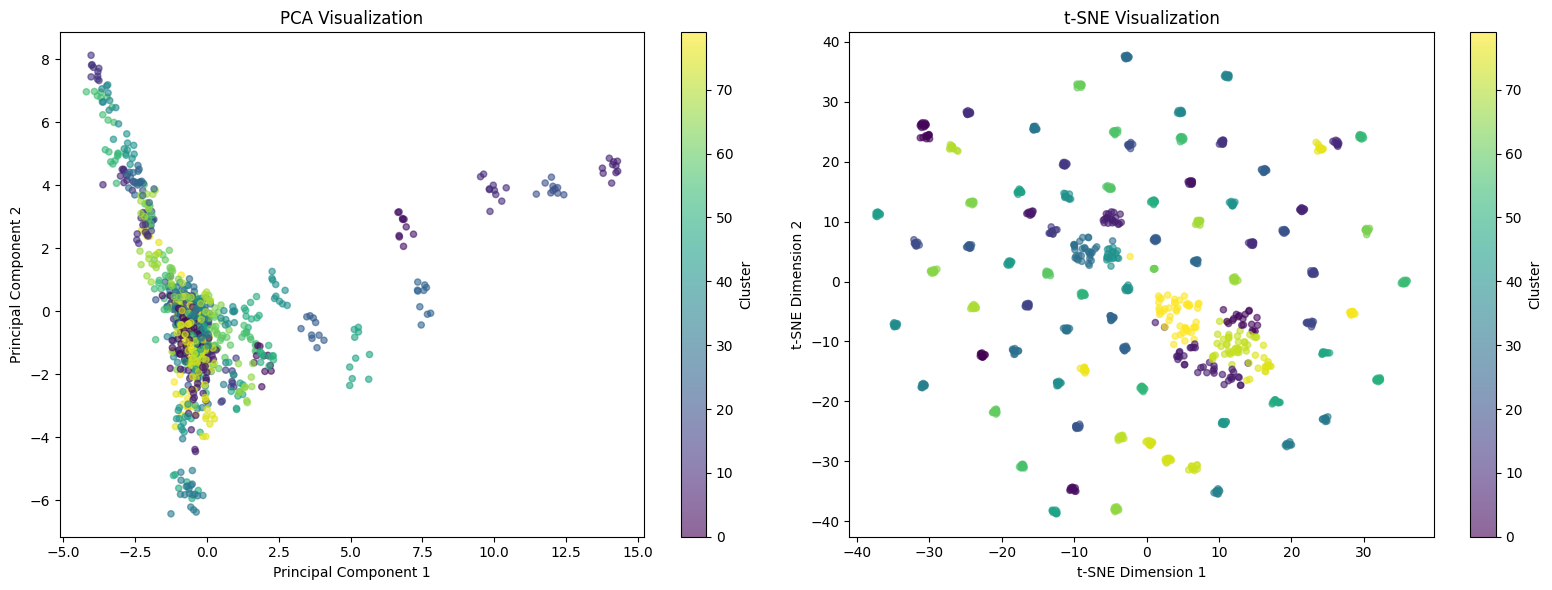

In [137]:
plt.figure(figsize=(16, 6))

for idx_subplot, x, title in zip(
    [(1, 2, x) for x in range(1, 2 + 1)],
    [x_pca, x_tsne],
    [("PCA", "Principal Component"), ("t-SNE", "t-SNE Dimension")],
):
    draw_visual(x, clusters, idx_subplot, title)
plt.tight_layout()
plt.show()

## Metrics

In [138]:
score = silhouette_score(df, df_orig["cluster"])
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.49


## Sillhouette Graph

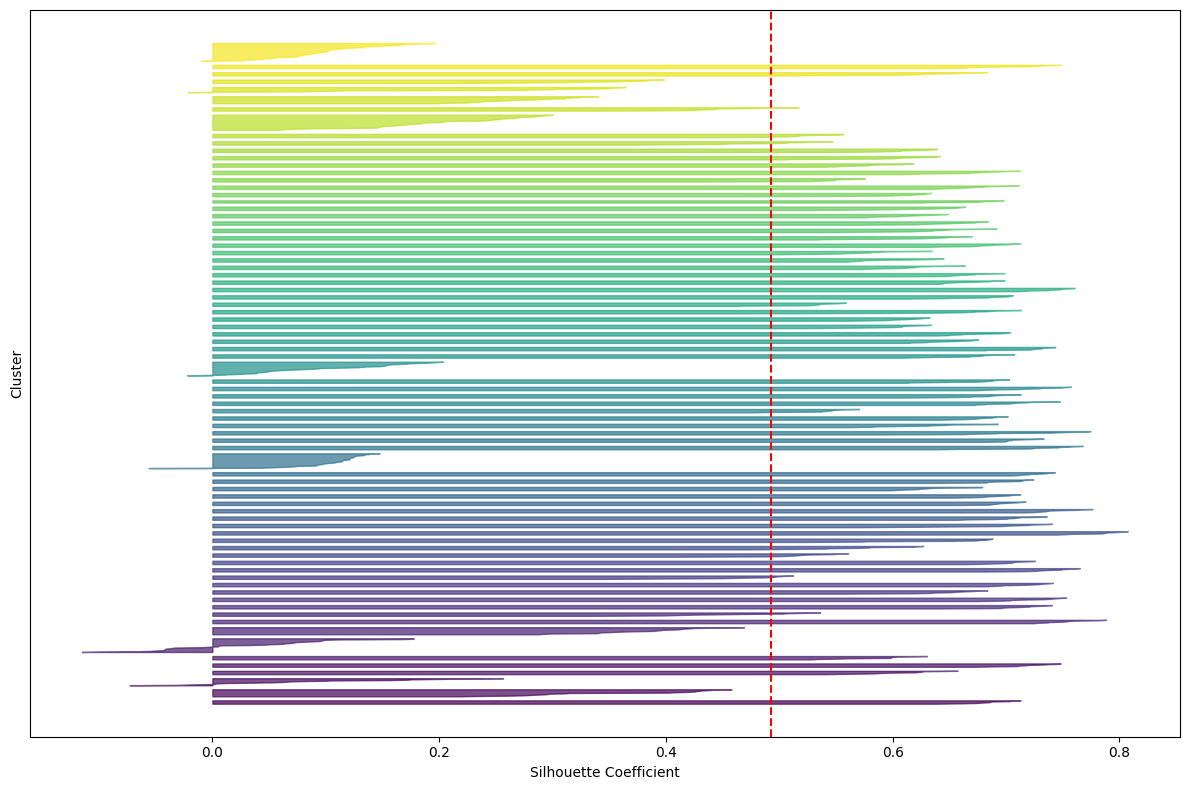

In [139]:
plt.figure(figsize=(12, 8))

score = silhouette_score(df, clusters)
sample_silhouette_values = silhouette_samples(df, clusters)

y_lower = 10
for i in range(K):
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = plt.cm.viridis(float(i) / K)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)
    
    # plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=score, color="red", linestyle="--")

plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")

plt.yticks([])  

plt.tight_layout()
plt.show()